In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)

170500096/170498071 [==============================] - 3s 0us/step
x_train:  (50000, 32, 32, 3)


In [3]:
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10    #32 x 32 x 3
# Din = 784 # MINIST


# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

print('y_train: ', y_train.shape)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
print('y_train: ', y_train.shape)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train:  (50000, 1)
y_train:  (50000, 10)


In [4]:
H = 200
std=1e-6
w1 = std*np.random.randn(Din, H)
w2 = std*np.random.randn(H, K)
b1 = np.zeros(H)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w1.shape)
print("b2:", b1.shape)
batch_size = Ntr

iterations = 300 #round(Ntr/batch_size)*1000
lr = 1.4e-2
lr_decay = 0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
batch_size = 500
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    for i in range(0,Ntr,batch_size):
        h = 1.0/(1.0+np.exp(-(x_train[i:i+batch_size].dot(w1)+b1)))
        y_pred = h.dot(w2)+b2

        loss = 1./batch_size*np.square(y_pred-y_train[i:i+batch_size]).sum() + reg*(np.sum(w2*w2)+np.sum(w1*w1))
        loss_history.append(loss)
    
        # Backward pass
        dy_pred = 1./batch_size*2.0*(y_pred-y_train[i:i+batch_size])
        dw2 = h.T.dot(dy_pred)+reg*w2
        db2 = dy_pred.sum(axis = 0)
        dh = dy_pred.dot(w2.T)
        dw1 = x_train[i:i+batch_size].T.dot(dh*h*(1-h))+reg*w1
        db1 = (dh*h*(1-h)).sum(axis=0)
        w1 = w1-lr*dw1
        w2 = w2-lr*dw2
        b1 = b1-lr*db1
        b2 = b2-lr*db2
        lr = lr*lr_decay


    #train data accuracy
    h_train = 1.0/(1.0+np.exp(-(x_train.dot(w1)+b1)))
    y_pred_train = h_train.dot(w2)+b2
    train_acc = 1/Ntr*(np.argmax(y_train,axis=1)==np.argmax(y_pred_train,axis=1)).sum()
    train_acc_history.append(train_acc)

    #test data acuracy
    h_test = 1.0/(1.0+np.exp(-(x_test.dot(w1)+b1)))
    y_pred_test = h_test.dot(w2)+b2
    test_acc = 1/Nte*(np.argmax(y_test,axis=1)==np.argmax(y_pred_test,axis=1)).sum()
    val_acc_history.append(test_acc)

    if t%20==0:
        print("Iteration " + str(t) + " : loss = " + str(loss))
        print("train accuracy :", train_acc)
        print("test accuracy :", test_acc)

w1: (3072, 200)
b1: (200,)
w2: (3072, 200)
b2: (200,)
Iteration 0 : loss = 0.7943489862814741
train accuracy : 0.38346
test accuracy : 0.3774
Iteration 20 : loss = 0.6265143843597619
train accuracy : 0.5879000000000001
test accuracy : 0.4592
Iteration 40 : loss = 0.6036200954597976
train accuracy : 0.63488
test accuracy : 0.4606
Iteration 60 : loss = 0.6000693703358854
train accuracy : 0.644
test accuracy : 0.46080000000000004
Iteration 80 : loss = 0.5993287164316614
train accuracy : 0.6453000000000001
test accuracy : 0.461
Iteration 100 : loss = 0.5992197795649825
train accuracy : 0.6453000000000001
test accuracy : 0.4612
Iteration 120 : loss = 0.5992048827636567
train accuracy : 0.6453000000000001
test accuracy : 0.46130000000000004
Iteration 140 : loss = 0.5992028656452254
train accuracy : 0.64532
test accuracy : 0.46130000000000004
Iteration 160 : loss = 0.5992025928748443
train accuracy : 0.64532
test accuracy : 0.46130000000000004
Iteration 180 : loss = 0.5992025559952836
train a

Text(0, 0.5, 'Loss')

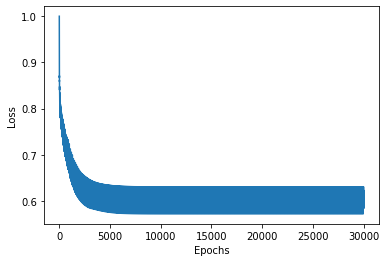

In [5]:
#loss
fig , ax = plt.subplots()
ax.plot(loss_history, label='loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')

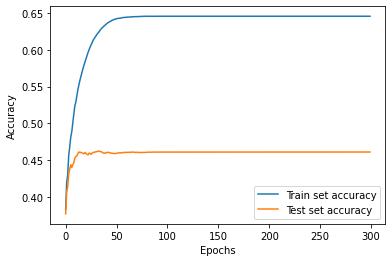

In [6]:
#Train and Test accuracies
fig , ax = plt.subplots()
ax.plot(train_acc_history, label='Train set accuracy')
ax.plot(val_acc_history, label = 'Test set accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend()

In [7]:
print("Initial learning rate: " + str(1.4e-2) + ", Train set accuracy: " + str(train_acc_history[-1]) + ", Test set accuracy: " + str(val_acc_history[-1]))

Initial learning rate: 0.014, Train set accuracy: 0.64532, Test set accuracy: 0.46130000000000004
